In [174]:
#import the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [175]:
#import the dataset
wine_data = pd.read_csv("winequality-white.csv",sep=';')
#print the first five entries
print(wine_data.head(5))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [176]:
#checking the correlation between our dataset factors
corr_matrix = wine_data.corr()
#see that density has some crazy numbers
print(corr_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [177]:
#x now containes all columns except quality so we can compare the factors
X = wine_data.drop(columns=["quality"])
#i would definitly recommend checking what happens when you drop density
#all the code is perfect
#X = wine_data.drop(columns=["density"])

#y is now quality
y = wine_data['quality'] 

#training our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [178]:
#printing again to see if density was dropped if running without density
#print(X.head(5))

In [179]:
#checking correlations without density
#corr_matrix = X.corr()
#print(corr_matrix)

In [180]:
#building the model
#model=GradientBoostingRegressor()

#running regressor with fixed seed for reproducibility 
model= DecisionTreeRegressor(random_state=42)
#model = SVR(kernel='linear', C=1.0, epsilon=0.1)
#training the regression model
model.fit(X_train, y_train)
#making predicitions for the testing set
y_pred = model.predict(X_test)
#checking the accuracy score bc again without density is crazy 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5979591836734693

In [181]:
#calculate the accuracy of the model

#this calculates the error value between the target value & predicted values
mse = mean_squared_error(y_test, y_pred) #lower MSE = better model performance 
#measure of how well the model's predicitions explain the target values
r2 = r2_score(y_test, y_pred)

print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')

R-squared: 0.14754424552704748
Mean Squared Error: 0.6602040816326531


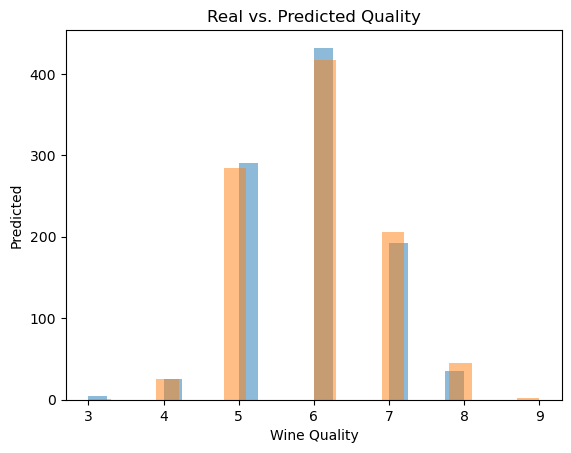

In [182]:
#creating a histogram and naming different axis'
plt.hist(y_test, bins=20, alpha=0.5, label='Real Wine Quality')
plt.hist(y_pred, bins=20, alpha=0.5, label='Real vs. Predicted Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Predicted')
plt.title('Real vs. Predicted Quality')
plt.show()

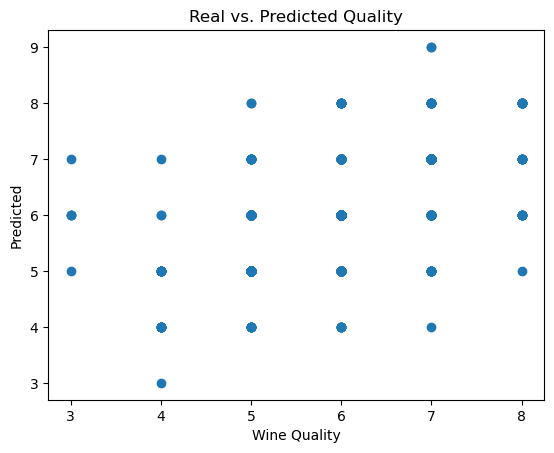

In [183]:
#creating a scatterplot and naming different axes
plt.scatter(y_test, y_pred)
plt.xlabel("Wine Quality")
plt.ylabel("Predicted")
plt.title("Real vs. Predicted Quality")
plt.show()

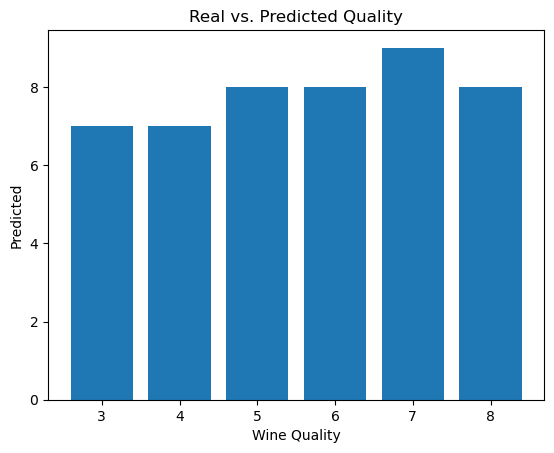

In [184]:
#creating a bar graph and naming different axes
plt.bar(y_test, y_pred)
plt.xlabel("Wine Quality")
plt.ylabel("Predicted")
plt.title("Real vs. Predicted Quality")
plt.show()

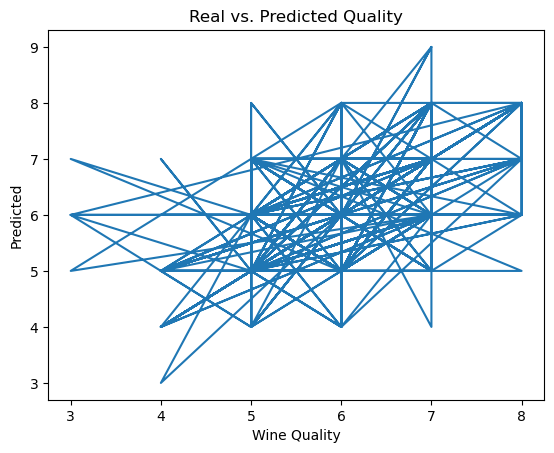

In [185]:
#creating an errorbar and naming different axes
plt.errorbar(y_test, y_pred)
plt.xlabel("Wine Quality")
plt.ylabel("Predicted")
plt.title("Real vs. Predicted Quality")
plt.show()

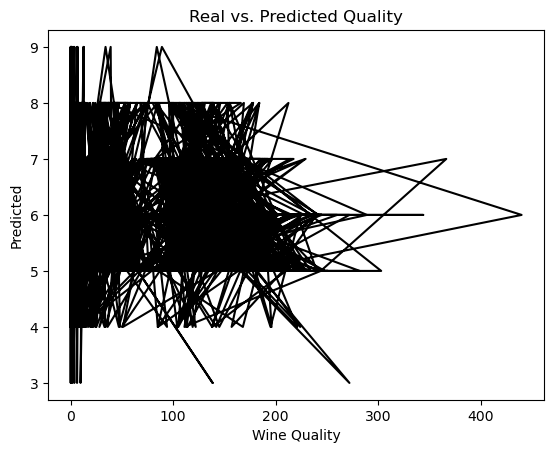

In [186]:
#creating a regression line plot and naming different axes
plt.plot(X_test, y_pred,color='k') 
plt.xlabel("Wine Quality")
plt.ylabel("Predicted")
plt.title("Real vs. Predicted Quality")
plt.show()

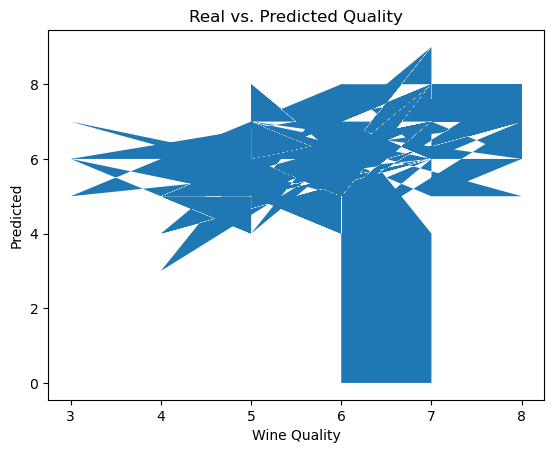

In [187]:
#creating an area chart and naming different axes
plt.fill_between(y_test, y_pred)
plt.xlabel("Wine Quality")
plt.ylabel("Predicted")
plt.title("Real vs. Predicted Quality")
plt.show()